In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

In [52]:
#Load the data set
data = pd.read_csv("D:/Om Data Science/bank-full.csv", sep=';')

In [53]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [55]:
data.shape

(45211, 17)

In [56]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
len(data['age'].unique())

77

In [58]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [59]:
data1=data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 14,]], axis=1,)

In [60]:
data1

,job,marital,default,balance,housing,poutcome,y
0,management,married,no,2143,yes,unknown,no
1,technician,single,no,29,yes,unknown,no
2,entrepreneur,married,no,2,yes,unknown,no
3,blue-collar,married,no,1506,yes,unknown,no
4,unknown,single,no,1,no,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,unknown,yes
45207,retired,divorced,no,1729,no,unknown,yes
45208,retired,married,no,5715,no,success,yes
45209,blue-collar,married,no,668,no,unknown,no


In [61]:
data2=pd.get_dummies(data1,columns=['job','marital','housing','poutcome'])
data2

,default,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,2143,no,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,no,29,no,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,no,2,no,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,no,1506,no,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,no,1,no,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,no,825,yes,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45207,no,1729,yes,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
45208,no,5715,yes,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
45209,no,668,no,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [62]:
data2['default']=np.where(data2['default'].str.contains("yes"),1,0)
data2['y'] =np.where(data2['y'].str.contains("yes"),1,0)
data2

,default,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,2143,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,29,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,1506,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45207,0,1729,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
45208,0,5715,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
45209,0,668,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [63]:
# Removing NA values in data set
data2 = data2.dropna()

In [64]:
# Dividing our data into input and output variables 
x=pd.concat([data2.iloc[:,0:2],data2.iloc[:,3:]],axis=1)
y=data2.iloc[:,2]

In [65]:
#Logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
# Confusion Matrix for the model accuracy

confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39541   381]
 [ 4475   814]]


In [70]:
(39541+814)/(39541+381+4474+814)

0.8926122539261225

In [71]:
from sklearn.metrics import classification_report

In [72]:
#Classification report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.68      0.15      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.79      0.57      0.60     45211
weighted avg       0.87      0.89      0.86     45211



# ROC Curve

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

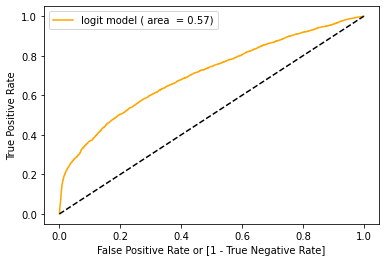

In [74]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='orange', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [75]:
auc

0.5721803598506974

In [76]:
import statsmodels.api as sm

In [77]:
sm.Logit(y,x).fit().summary()

         Current function value: 0.319027
         Iterations: 35


C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           21
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.1160
Time:                        21:22:38   Log-Likelihood:                -14424.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3996      0.146     -2.734      0.006      -0.686      -0.113
balance            2.523e-05   4.17e-06      6.044      0.000     1.7e-05    3.34e-05
job_admin.           -0.0638        nan        nan        nan         nan         nan
job_blue-collar      -0.3785        nan        nan        nan         nan         nan
job_entrepreneur     -0.3229        nan        nan        nan         nan         nan
job_housemaid        -0.4511        nan        nan        nan         nan         nan
job_management        0.0054        nan        nan        nan         nan         nan
job_retired           0.4651        nan        nan        nan         nan         nan
job_self-employed    -0.1395        nan        nan        nan         nan         nan
job_services         -0.2685        nan        nan        nan         nan         nan
job_student           0.4604        nan        nan        nan         nan         nan
job_technician       -0.1833        nan        nan        nan         nan         nan
job_unemployed        0.0930        nan        nan        nan         nan         nan
job_unknown          -0.3386        nan        nan        nan         nan         nan
marital_divorced     -0.3779        nan        nan        nan         nan         nan
marital_married      -0.5638        nan        nan        nan         nan         nan
marital_single       -0.1804        nan        nan        nan         nan         nan
housing_no           -0.2082        nan        nan        nan         nan         nan
housing_yes          -0.9140        nan        nan        nan         nan         nan
poutcome_failure     -0.7929        nan        nan        nan         nan         nan
poutcome_other       -0.5376        nan        nan        nan         nan         nan
poutcome_success      1.4626        nan        nan        nan         nan         nan
poutcome_unknown     -1.2542        nan        nan        nan         nan         nan
=====================================================================================
"""